In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
def read_csv(filename):
    return pd.read_csv(filename)

def read_multiple_csv(alg="dt"):
    df1 = read_csv(f"cv_{alg}.csv")
    df2 = read_csv(f"tfidf_{alg}.csv")
    df3 = read_csv(f"d2v_{alg}.csv")

    df = concat_dfs([df1, df2, df3], ["cv", "tfidf", "d2v"])

    g = df.groupby("origin").agg(['mean', 'max'])
    g.columns = g.columns.map('_'.join)

    return g[["mean_fit_time_mean", "mean_train_score_mean", "mean_train_score_max", "mean_test_score_mean", "mean_test_score_max"]]

def concat_dfs(dfs, columns, origin="origin"):
    for i, c in enumerate(columns):
        dfs[i][origin] = c
    return pd.concat(dfs, ignore_index=True)

def faz_grafico(df, x, y, secondary_y, logx=False):    
    ax = df.plot(x=x, y=secondary_y, secondary_y=True, marker='^', color='green')
    df.plot(x=x, y=y, ax=ax, marker='x', logx=logx)

def print_latex(df, params=None):
    if params and len(params) > 0:
        print(df[params].to_latex(index=False, float_format="%.4f"))

def faz_graficos_dt(df):
    df2 = df.fillna(64)
    df2 = df2.groupby("param_dt__max_depth").mean().reset_index()
    faz_grafico(df2, "param_dt__max_depth", ["mean_test_score", "mean_train_score"], ['mean_fit_time'])
    
    df2 = df.groupby("param_dt__min_samples_split").mean().reset_index()
    faz_grafico(df2, "param_dt__min_samples_split", ["mean_test_score", "mean_train_score"], ['mean_fit_time'], logx=True)

def faz_graficos_rf(df):
    df2 = df.groupby("param_rf__min_samples_leaf").mean().reset_index()
    faz_grafico(df2, "param_rf__min_samples_leaf", ["mean_test_score", "mean_train_score"], ['mean_fit_time'])

    df2 = df.groupby("param_rf__min_samples_split").mean().reset_index()
    faz_grafico(df2, "param_rf__min_samples_split", ["mean_test_score", "mean_train_score"], ['mean_fit_time'], logx=True)

    df2 = df.groupby("param_rf__n_estimators").mean().reset_index()
    faz_grafico(df2, "param_rf__n_estimators", ["mean_test_score", "mean_train_score"], ['mean_fit_time'])

def faz_graficos_mlknn(df):
    df2 = df.groupby("param_mlknn__k").mean().reset_index()
    faz_grafico(df2, "param_mlknn__k", ["mean_test_score", "mean_train_score"], ['mean_fit_time'])

    df2 = df.groupby("param_mlknn__s").mean().reset_index()
    faz_grafico(df2, "param_mlknn__s", ["mean_test_score", "mean_train_score"], ['mean_fit_time'])

def faz_graficos_mlp(df):
    df2 = df.groupby("param_mlp__activation").mean().reset_index()
    faz_grafico(df2, 'param_mlp__activation', ["mean_test_score", "mean_train_score"], ["mean_fit_time"])

    df2 = df.groupby("param_mlp__hidden_layer_sizes").mean().reset_index()
    faz_grafico(df2, "param_mlp__hidden_layer_sizes", ["mean_test_score", "mean_train_score"], ['mean_fit_time'])

    df2 = df.groupby("param_mlp__solver").mean().reset_index()
    faz_grafico(df2, "param_mlp__solver", ["mean_test_score", "mean_train_score"], ['mean_fit_time'])

def print_latex_dt(df):
    print_latex(df, ["param_dt__max_depth", "param_dt__min_samples_split", "mean_fit_time",  "mean_train_score", "mean_test_score"])

def print_latex_rf(df):
    print_latex(df, ["param_rf__min_samples_leaf" ,"param_rf__min_samples_split" , "param_rf__n_estimators", "mean_fit_time",  "mean_train_score", "mean_test_score"])

def print_latex_mlknn(df):
    print_latex(df, ["param_mlknn__k", "param_mlknn__s", "mean_fit_time",  "mean_train_score", "mean_test_score"])

def print_latex_mlp(df):
    print_latex(df, ["param_mlp__activation", "param_mlp__hidden_layer_sizes", "param_mlp__solver", "mean_fit_time",  "mean_train_score", "mean_test_score"])

In [3]:
df = read_csv("tfidf_mlp.csv")

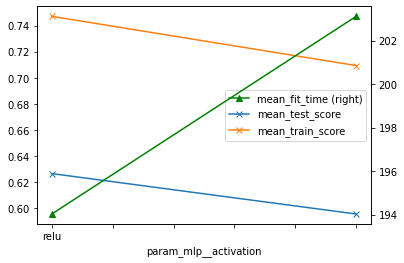

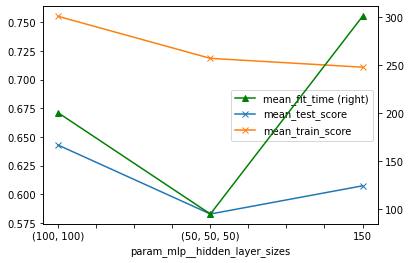

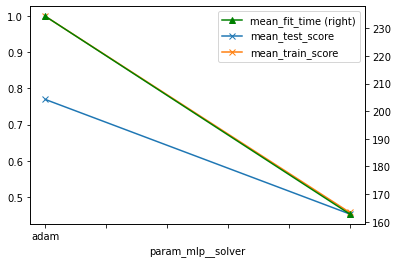

In [4]:
faz_graficos_mlp(df)

In [5]:
print_latex_mlp(df)

\begin{tabular}{lllrrr}
\toprule
param\_mlp\_\_activation & param\_mlp\_\_hidden\_layer\_sizes & param\_mlp\_\_solver &  mean\_fit\_time &  mean\_train\_score &  mean\_test\_score \\
\midrule
                 tanh &                           150 &               sgd &       266.2043 &            0.4163 &           0.4137 \\
                 tanh &                           150 &              adam &       356.9774 &            0.9998 &           0.7941 \\
                 tanh &                    (100, 100) &               sgd &       163.7233 &            0.5072 &           0.5031 \\
                 tanh &                    (100, 100) &              adam &       252.1229 &            0.9999 &           0.7837 \\
                 tanh &                  (50, 50, 50) &               sgd &        76.7089 &            0.3356 &           0.3329 \\
                 tanh &                  (50, 50, 50) &              adam &       102.9910 &            0.9975 &           0.7463 \\
          

In [6]:
read_multiple_csv("mlp")

,mean_fit_time_mean,mean_train_score_mean,mean_train_score_max,mean_test_score_mean,mean_test_score_max
origin,,,,,
cv,519.505766,0.925268,1.000000,0.754595,0.790670
d2v,26.673255,0.723635,0.890508,0.668451,0.758572
tfidf,198.576795,0.728260,1.000000,0.611118,0.796911
